In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Generating data

In [2]:
sample_size = int(1e2);
dimension = (sample_size,1);


x = np.reshape(np.linspace(0,1, num=sample_size),dimension)
y = np.reshape(np.sin(2*np.pi*x),dimension)

In [47]:
#Observations

N_obs = 10

#data = np.zeros((10,int(sample_size)))

t = np.sin(2*np.pi*x) + np.reshape(np.random.normal(size=sample_size,scale=0.1),dimension);

#for i in range(N_obs):
#    np.random.seed(i**2)
#    t[i] = np.sin(2*np.pi*x) + np.random.normal(size=sample_size,scale=0.35);
#    break

#data = np.sin(2*np.pi*x) + (np.e**x)*1.7 + np.random.normal(size=sample_size,scale=0.35);

In [48]:
x.shape

(100, 1)

In [49]:
t.shape

(100, 1)

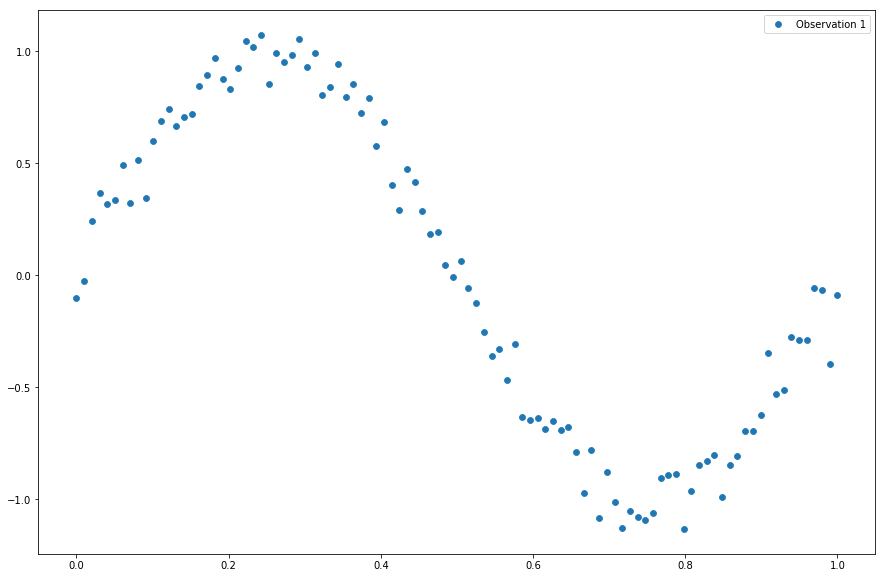

In [50]:
plt.figure(figsize=(15,10))
for i in range(1):
    legend = "Observation "+str(i+1)
    plt.plot(x,t,'o',markeredgewidth=0.75,label=legend)
    #plt.plot(x[0],t[i],'o',markerfacecolor='none',markeredgewidth=0.75,label=legend)
    plt.legend()

#### Defining the function

Now, we'll see the problem of $ y(\boldsymbol{x},\boldsymbol{w}) = w_0 + w_1 x^1 + ... + w_D x^D $ and make some changes. Let's choose some arbitrary function class $ \phi(x) $ and then, our previous relation becomes $ y(\boldsymbol{x},\boldsymbol{\phi}) = w_0 + w_1 \phi_1 + ... + w_D \phi_D $, such that $ \phi_i $ are apparently linearly independent. So, in this example we'll choose the function $$ \phi_i(x| \mu_i, s) = \exp \left( -\frac{(x-\mu_i)^2}{s^2} \right) $$

In [51]:
def f_phi(x,mu,s=1):
    return np.e**(-(x-mu)**2 / s**2)

Defining the model matrix

In [52]:
M = 10

In [53]:
phi = np.zeros((len(x),M))

for i in range(len(x)):
    for j in range(M):
        phi[i][j] = f_phi(x[i],(1/M*j))

In [54]:
phi.shape

(100, 10)

In [55]:
W = ((np.linalg.inv(phi.T@phi))@phi.T)@t

In [56]:
W.shape

(10, 1)

In [57]:
y_pred = np.zeros((len(x),1))

for i in range(len(x)):
    y_pred[i][0] = sum([W[j][0]*f_phi(x[i],(1/M*j)) for j in range(M)])

In [58]:
y_pred.shape

(100, 1)

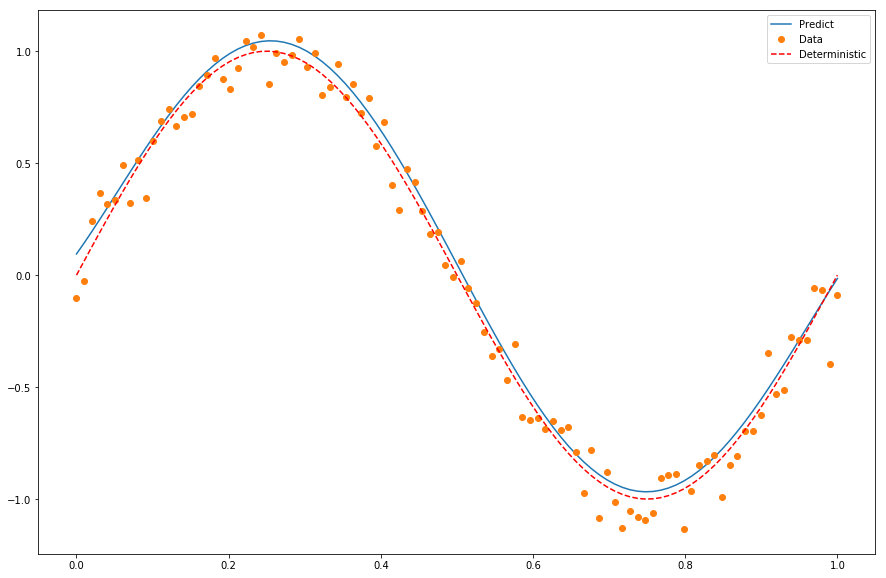

In [59]:
plt.figure(figsize=(15,10));
plt.plot(x,y_pred,label='Predict');
plt.plot(x,t,'o',label='Data');
plt.plot(x,y,'r--',label='Deterministic');
plt.legend();

#### Implementing

In [75]:
def linear_basis_model(x_data, y_data, func, M = 3):
    
    if (any(item%i == 1 for item in x_data.shape)):
        x_data = np.reshape((len(x_data),1))
        
    if (any(item%i == 1 for item in y_data.shape)):
        y_data = np.reshape((len(y_data),1))
    
    if (len(x_data) != len(y_data)):
        return print("Different X, Y lengths!")
    else:
        
        import numpy as np
        
        def f_phi(x,mu,s=1):
            return np.e**(-(x-mu)**2 / s**2)
        
        def poly(x,i):
            return x**i
        
        #func = {'sin': np.sin, 'gaussian': f_phi, 'poly': poly}
        
        if func is 'sin':
            parameters = np.zeros((1,M))
            parameters = 1
            def f(data,parameters):
                return np.sin(data)
            
        elif func is 'gaussian':
            parameters = np.zeros((1,M))
            parameters = [i/M for i in range(M)]
            def f(data,parameters):
                return f_phi(data,parameters)
        
        else func is 'poly':
            parameters = np.zeros((1,M))
            parameters = [i in range(M)]
            def f(data,parameters):
                return x**parameters
        
        phi = np.zeros((len(x),M))

        for i in range(len(x)):
            for j in range(M):
                phi[i][j] = f(x[i],parameters[j])
        
        W = ((np.linalg.inv(phi.T@phi))@phi.T)@y_data
        
        y_pred = np.zeros((len(x),1))

        for i in range(len(x)):
            y_pred[i][0] = sum([W[j][0]*function(x[i],parameters[j]) for j in range(M)])

SyntaxError: invalid syntax (<ipython-input-75-0aaee8841048>, line 35)

In [69]:
not any(item%i == 1 for item in x.shape)

False

In [65]:
x.shape

(100, 1)